In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
from copy import copy
from scipy.ndimage import gaussian_filter1d
from scipy.signal import medfilt
import utils2p

In [46]:
raw_path = "/home/jbraun/bin/deepinterpolation/sample_data/longterm_003_crop.tif"
full_path = "/home/jbraun/bin/deepinterpolation/sample_data/denoised_longterm_003_crop_out.tif"
halves_path = "/home/jbraun/bin/deepinterpolation/sample_data/denoised_halves_longterm_003_crop_out.tif"
right_path = "/home/jbraun/bin/deepinterpolation/sample_data/denoised_right_longterm_003_crop_out.tif"
left_path = "/home/jbraun/bin/deepinterpolation/sample_data/denoised_left_longterm_003_crop_out.tif"
center_path = "/home/jbraun/bin/deepinterpolation/sample_data/denoised_center_longterm_003_crop_out.tif"
random1_05_path = "/home/jbraun/bin/deepinterpolation/sample_data/denoised_random1_05_longterm_003_crop_out.tif"
random1_01_path = "/home/jbraun/bin/deepinterpolation/sample_data/denoised_random1_01_longterm_003_crop_out.tif"
randomlrc_05_path = "/home/jbraun/bin/deepinterpolation/sample_data/denoised_randomlrc1_05_longterm_003_crop_out.tif"
randomlrc_01_path = "/home/jbraun/bin/deepinterpolation/sample_data/denoised_randomlrc1_01_longterm_003_crop_out.tif"
multi1_01_path = "/home/jbraun/bin/deepinterpolation/sample_data/denoised_multi_longterm_random1_01_003_crop_out.tif"


raw = utils2p.load_img(raw_path)[30:-30,:,:]
full = utils2p.load_img(full_path)
halves = utils2p.load_img(halves_path)
left = utils2p.load_img(left_path)
right = utils2p.load_img(right_path)
center = utils2p.load_img(center_path)
random1_05 = utils2p.load_img(random1_05_path)
random1_01 = utils2p.load_img(random1_01_path)
randomlrc_05 = utils2p.load_img(randomlrc_05_path)
randomlrc_01 = utils2p.load_img(randomlrc_01_path)
multi1_01 = utils2p.load_img(multi1_01_path)

In [47]:
random = random1_01

In [48]:
assert full.shape == raw.shape
assert full.shape == random.shape
assert full.shape == halves.shape
assert left.shape == right.shape
assert left.shape == center.shape
assert left.shape[0:1] == full.shape[0:1]

In [49]:
N_frames, N_y, N_x = full.shape
_, _, N_x_small = left.shape
offset = N_x - N_x_small

# check whether inputting a 320x576 frame after training on 320x320 makes any difference

In [22]:
rtol = 0.01
atol = 1

compare_full = N_frames - np.sum(np.isclose(halves, full, rtol=rtol, atol=atol), axis=0).astype(np.float)
compare_left = N_frames - np.sum(np.isclose(left, full[:,:,:N_x_small], rtol=rtol, atol=atol), axis=0).astype(np.float)
compare_right = N_frames - np.sum(np.isclose(right, full[:,:,-N_x_small:], rtol=rtol, atol=atol), axis=0).astype(np.float)
compare_center = N_frames - np.sum(np.isclose(center, full[:,:,offset // 2: offset // 2 + N_x_small], rtol=rtol, atol=atol), axis=0).astype(np.float)

compare_full[compare_full==0] = np.nan
compare_left[compare_left==0] = np.nan
compare_right[compare_right==0] = np.nan
compare_center[compare_center==0] = np.nan


In [23]:
compare_raw = N_frames - np.sum(np.isclose(raw, full, rtol=0.1, atol=10), axis=0).astype(np.float)
compare_raw[compare_raw==0] = np.nan

compare_random =  N_frames - np.sum(np.isclose(random, full, rtol=0.1, atol=10), axis=0).astype(np.float)
compare_random[compare_random==0] = np.nan


<IPython.core.display.Javascript object>


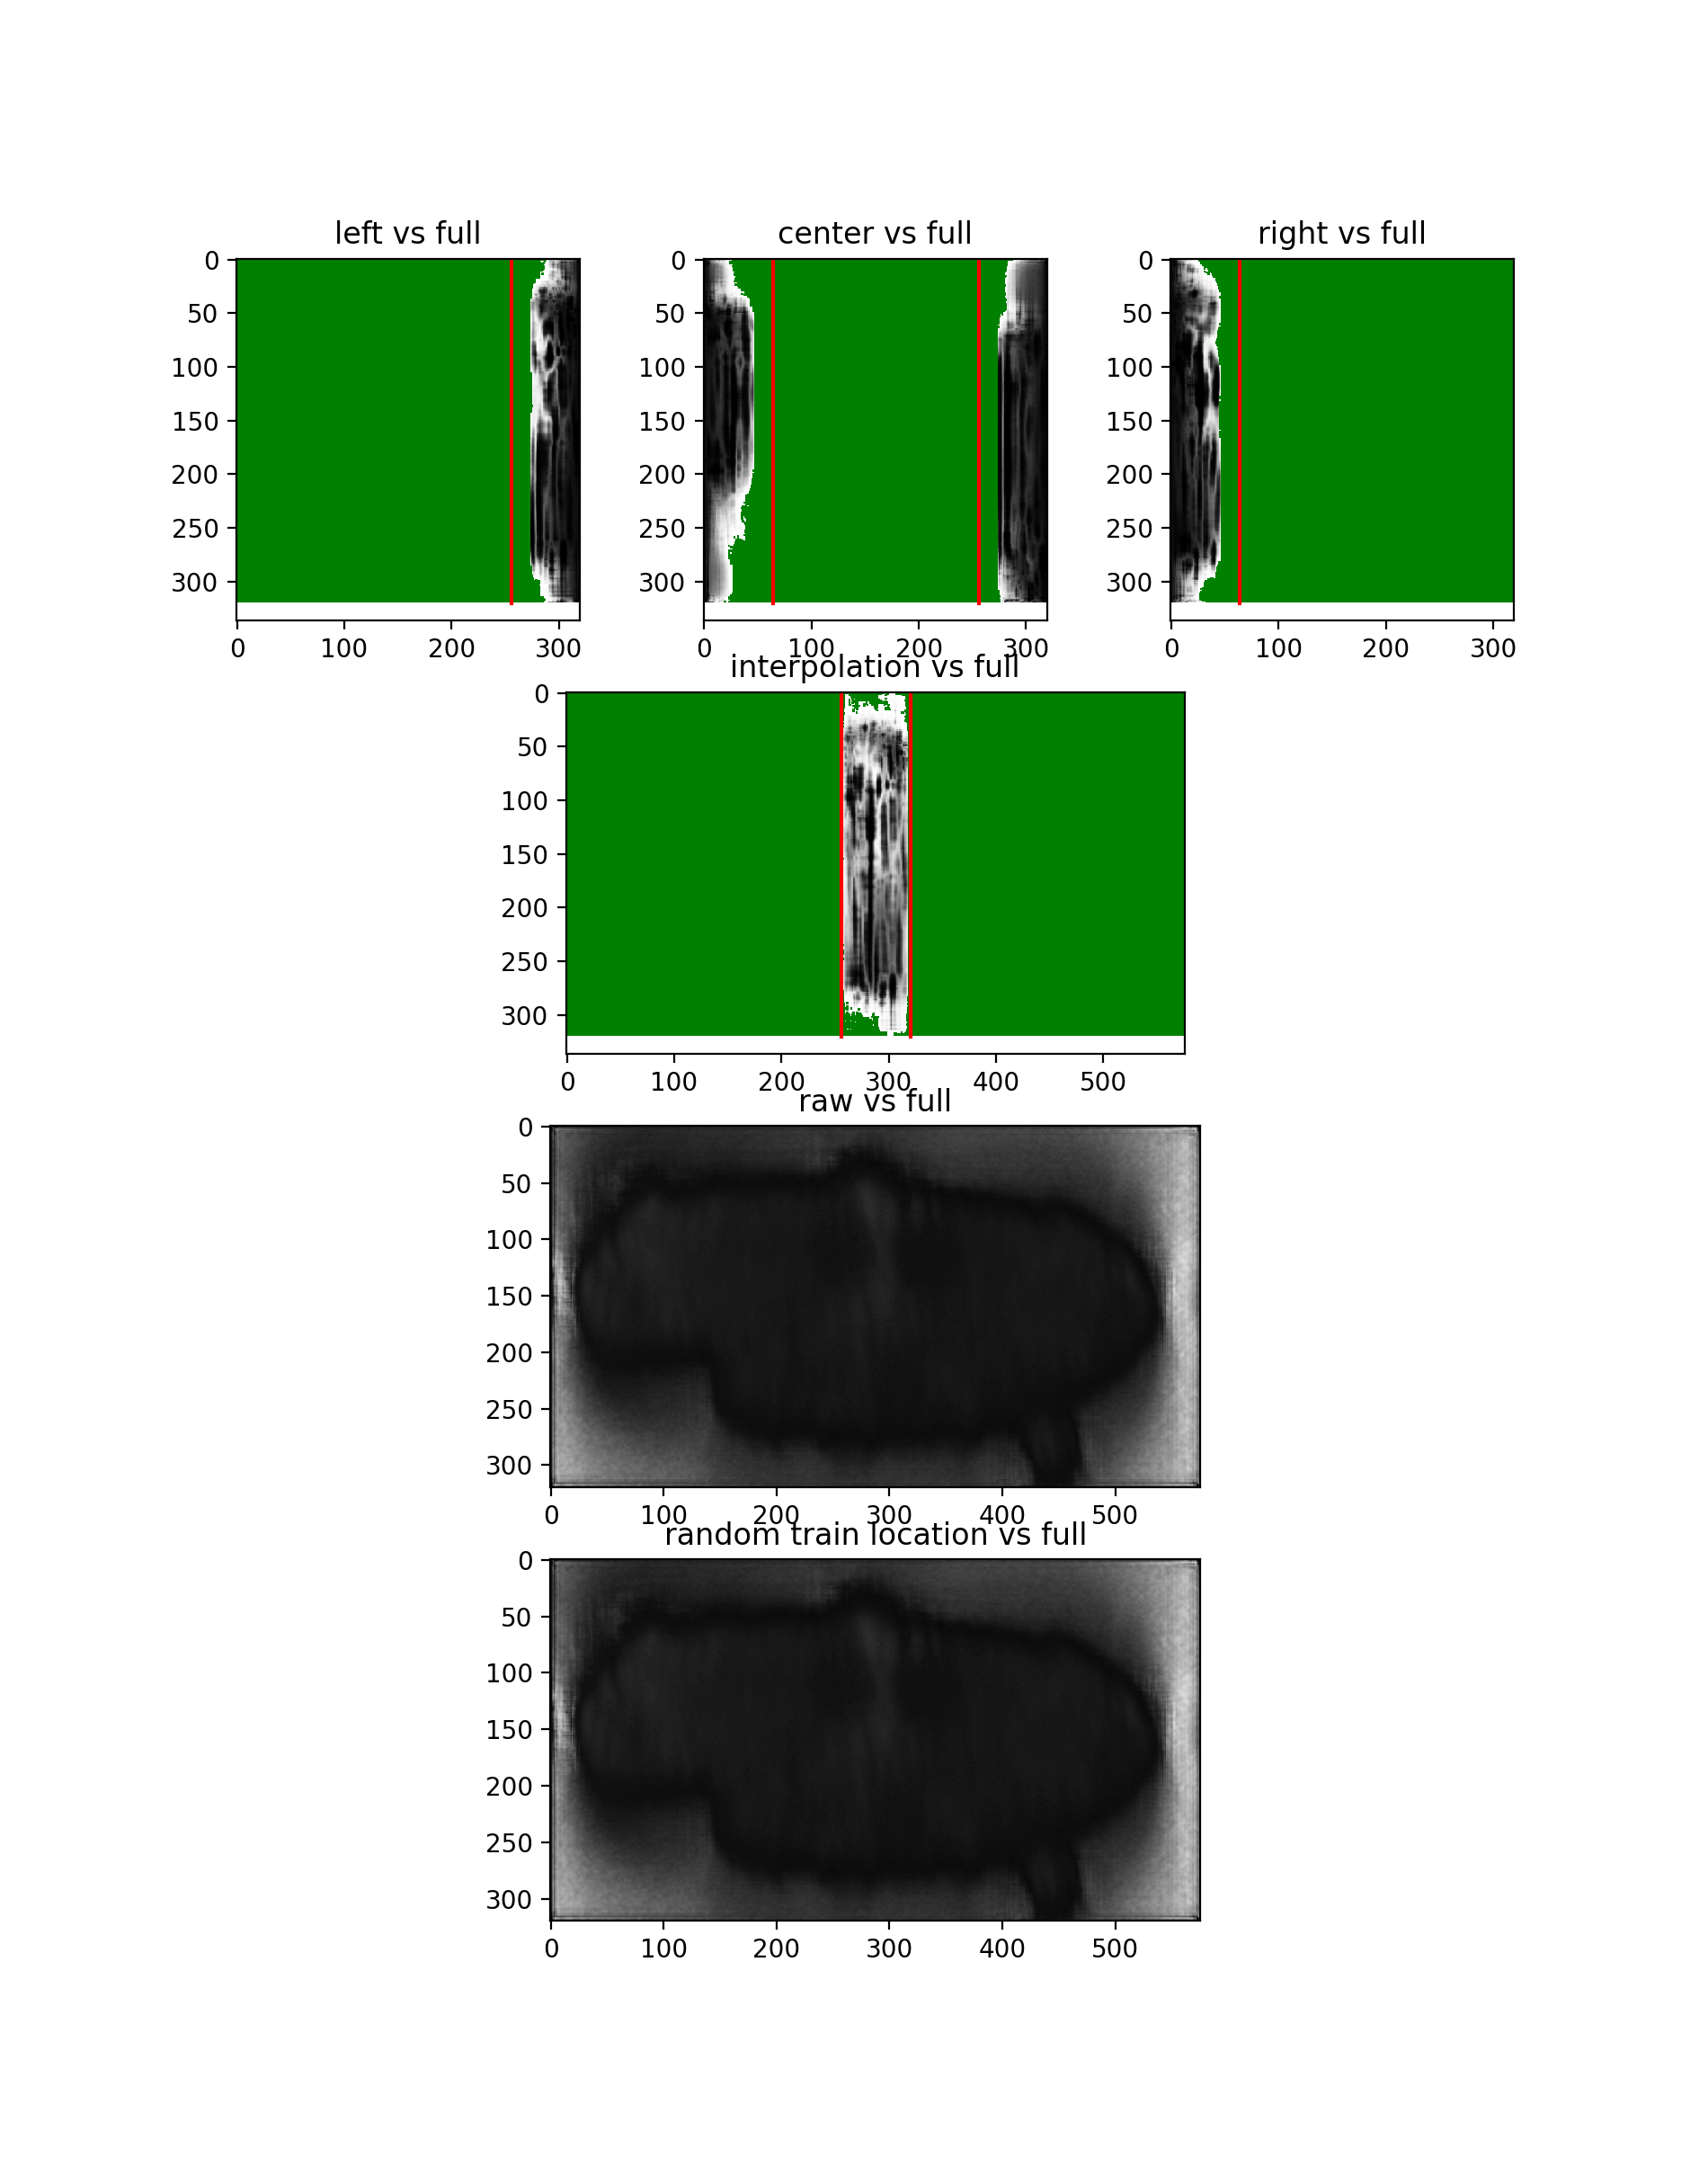

Text(0.5, 1.0, 'random train location vs full')

In [24]:
%matplotlib notebook
cmap = copy(plt.cm.binary)
cmap.set_bad(color='green')

fig = plt.figure(figsize=(9.5, 12))
ax1 = plt.subplot2grid((4, 3), (0, 0), colspan=1)
ax2 = plt.subplot2grid((4, 3), (0, 1), colspan=1)
ax3 = plt.subplot2grid((4, 3), (0, 2), colspan=1)
ax4 = plt.subplot2grid((4, 3), (1, 0), colspan=3)
ax5 = plt.subplot2grid((4, 3), (2, 0), colspan=3)
ax6 = plt.subplot2grid((4, 3), (3, 0), colspan=3)

ax1.imshow(compare_left, cmap=cmap, clim=[0, N_frames])
ax1.plot([N_x-N_x_small, N_x-N_x_small], [0, N_y], "r-")
ax1.set_title("left vs full")
ax2.imshow(compare_center, cmap=cmap, clim=[0, N_frames])
ax2.plot([N_x-N_x_small, N_x-N_x_small], [0, N_y], "r-")
ax2.plot([2*N_x_small-N_x, 2*N_x_small-N_x], [0, N_y], "r-")
ax2.set_title("center vs full")
ax3.imshow(compare_right, cmap=cmap, clim=[0, N_frames])
ax3.plot([2*N_x_small-N_x, 2*N_x_small-N_x], [0, N_y], "r-")
ax3.set_title("right vs full")

ax4.imshow(compare_full, cmap=cmap, clim=[0, N_frames])
ax4.plot([N_x-N_x_small, N_x-N_x_small], [0, N_y], "r-")
ax4.plot([N_x_small, N_x_small], [0, N_y], "r-")
ax4.set_title("interpolation vs full")

ax5.imshow(compare_raw, cmap=cmap, clim=[0, N_frames])
ax5.set_title("raw vs full")

ax6.imshow(compare_raw, cmap=cmap, clim=[0, N_frames])
ax6.set_title("random train location vs full")

# check what the denoising did

### pixels of interest
bottom right: 201, 471 <br>
center, center: 162, 274 <br>
center, left: 165, 102 <br>
top, center: 73, 324 <br>
top, left: 113, 50

In [10]:
pixels = [[113, 50], [73, 324], [165, 102], [162, 274], [201, 471]]

In [50]:
std_raw = np.std(raw, axis=0)
std_denoised = np.std(full, axis=0)
std_random1_01 = np.std(random1_01, axis=0)
std_random1_05 = np.std(random1_05, axis=0)
std_randomlrc_01 = np.std(randomlrc_01, axis=0)
std_randomlrc_05 = np.std(randomlrc_05, axis=0)
std_multi1_01 = np.std(multi1_01, axis=0)

In [51]:
np.mean(std_multi1_01)

93.24278

<IPython.core.display.Javascript object>


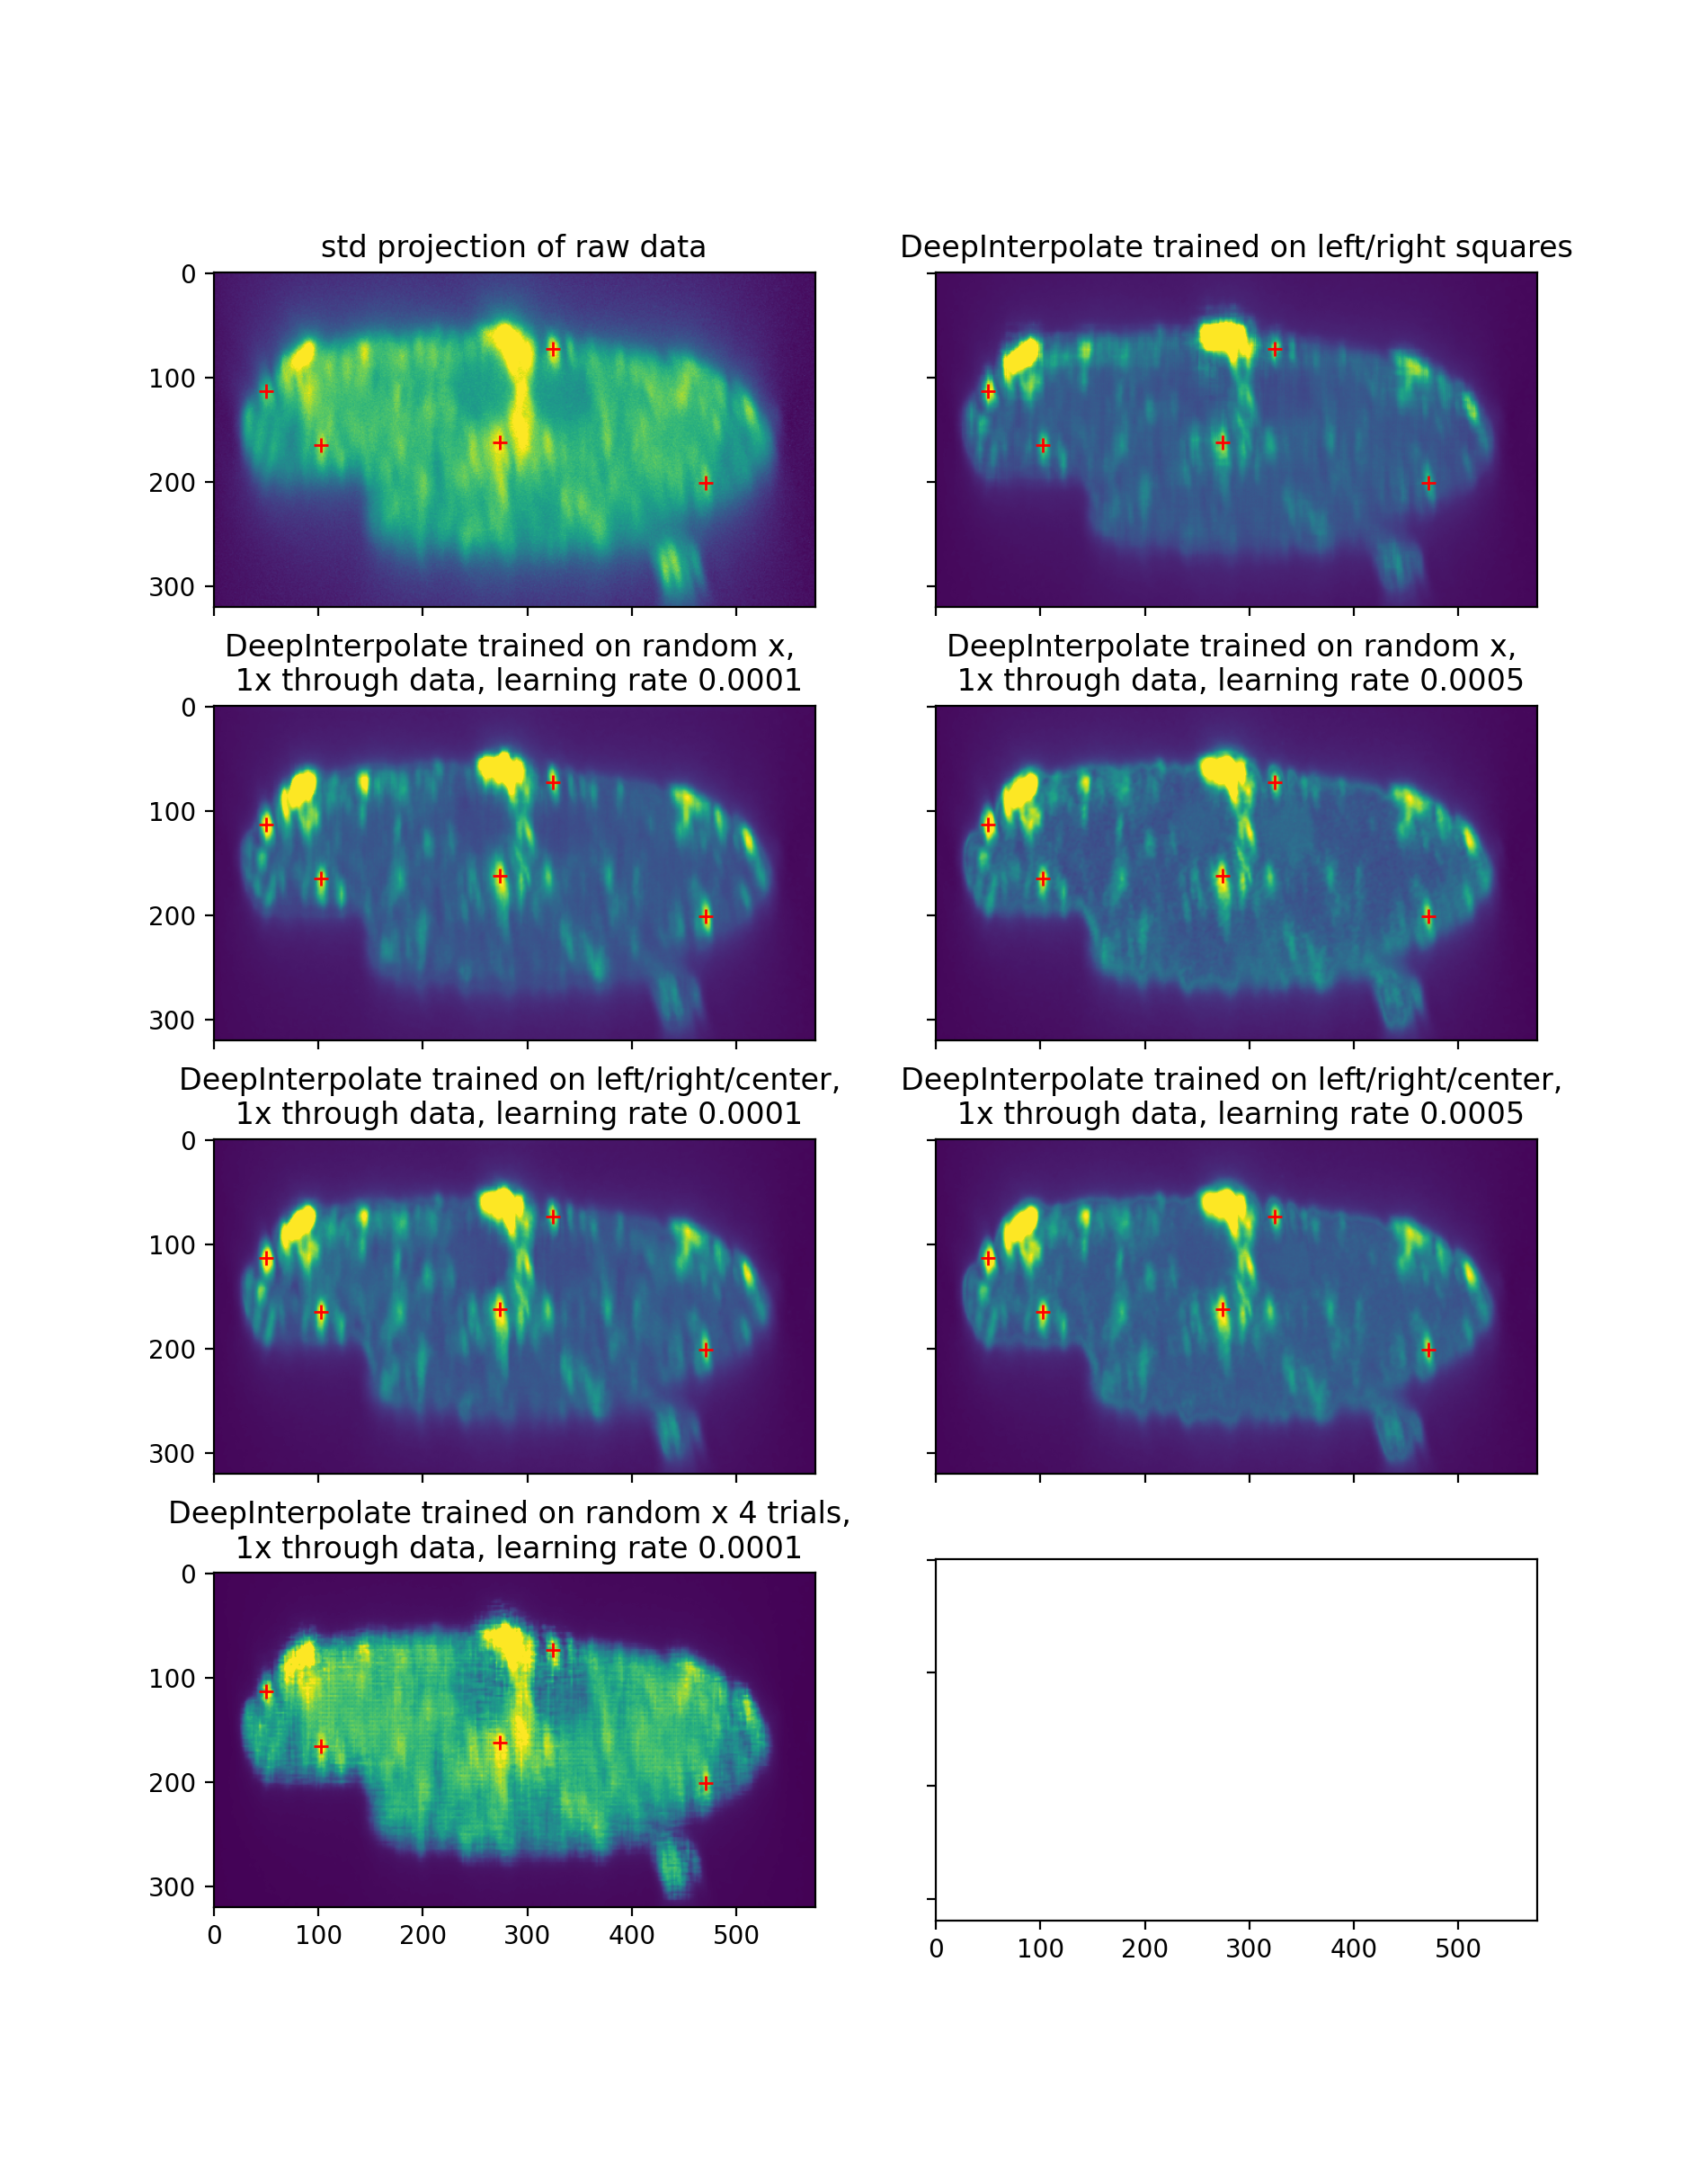

In [53]:
%matplotlib notebook
quantile = 0.99
fig, axs = plt.subplots(nrows=4, ncols=2, figsize=(9.5, 12), sharex=True, sharey=True)
axs[0,0].imshow(std_raw, clim=[0, np.quantile(std_raw, quantile)])
axs[0,0].set_title("std projection of raw data")
axs[0,1].imshow(std_denoised, clim=[0, np.quantile(std_denoised, quantile)])
axs[0,1].set_title("DeepInterpolate trained on left/right squares")

axs[1,0].imshow(std_random1_01, clim=[0, np.quantile(std_random1_01, quantile)])
axs[1,0].set_title("DeepInterpolate trained on random x, \n 1x through data, learning rate 0.0001")
axs[1,1].imshow(std_random1_05, clim=[0, np.quantile(std_random1_05, quantile)])
axs[1,1].set_title("DeepInterpolate trained on random x, \n 1x through data, learning rate 0.0005")

axs[2,0].imshow(std_randomlrc_01, clim=[0, np.quantile(std_randomlrc_01, quantile)])
axs[2,0].set_title("DeepInterpolate trained on left/right/center, \n 1x through data, learning rate 0.0001")
axs[2,1].imshow(std_randomlrc_05, clim=[0, np.quantile(std_randomlrc_05, quantile)])
axs[2,1].set_title("DeepInterpolate trained on left/right/center, \n 1x through data, learning rate 0.0005")

axs[3,0].imshow(std_multi1_01, clim=[0, np.quantile(std_multi1_01, quantile)])
axs[3,0].set_title("DeepInterpolate trained on random x 4 trials, \n 1x through data, learning rate 0.0001")

_ = [axs[0,0].plot(pixel[1], pixel[0], 'r+') for pixel in pixels]
_ = [axs[0,1].plot(pixel[1], pixel[0], 'r+') for pixel in pixels]
_ = [axs[1,0].plot(pixel[1], pixel[0], 'r+') for pixel in pixels]
_ = [axs[1,1].plot(pixel[1], pixel[0], 'r+') for pixel in pixels]
_ = [axs[2,0].plot(pixel[1], pixel[0], 'r+') for pixel in pixels]
_ = [axs[2,1].plot(pixel[1], pixel[0], 'r+') for pixel in pixels]
_ = [axs[3,0].plot(pixel[1], pixel[0], 'r+') for pixel in pixels]




# observations: 
# std gets much smaller ~330 ->~50 (full), -> 40 (random)
# random1_01: 43, 1_05: 40, lrc_01: 45, lrc_05: 38
# multi1_01: 93
# max becomes much smoother
# mean gets a little smaller: ~320 -> ~280 -> ~230
# MEAN HAS SOME SQUARE PATTERNS for full, but not for random

<IPython.core.display.Javascript object>


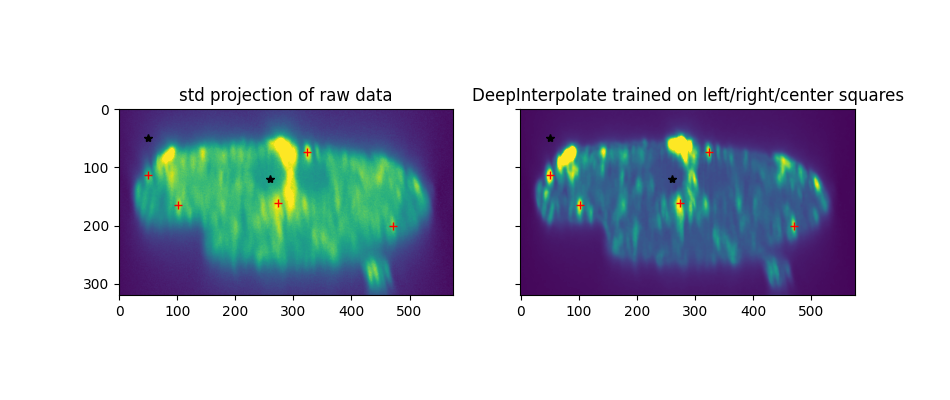

In [87]:
%matplotlib notebook
quantile = 0.99
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(9.5, 4), sharex=True, sharey=True)
axs[0].imshow(std_raw, clim=[0, np.quantile(std_raw, quantile)])
axs[0].set_title("std projection of raw data")
axs[1].imshow(std_randomlrc_01, clim=[0, np.quantile(std_randomlrc_01, quantile)])
axs[1].set_title("DeepInterpolate trained on left/right/center squares")

_ = [axs[0].plot(pixel[1], pixel[0], 'r+') for pixel in pixels]
_ = [axs[1].plot(pixel[1], pixel[0], 'r+') for pixel in pixels]

_ = [axs[0].plot(pixel[1], pixel[0], 'k*') for pixel in [[50,50], [120, 260]]]
_ = [axs[1].plot(pixel[1], pixel[0], 'k*') for pixel in [[50,50], [120, 260]]]


# observations: 
# std gets much smaller ~330 ->~50 (full), -> 40 (random)
# random1_01: 43, 1_05: 40, lrc_01: 45, lrc_05: 38
# multi1_01: 93
# max becomes much smoother
# mean gets a little smaller: ~320 -> ~280 -> ~230
# MEAN HAS SOME SQUARE PATTERNS for full, but not for random

<IPython.core.display.Javascript object>


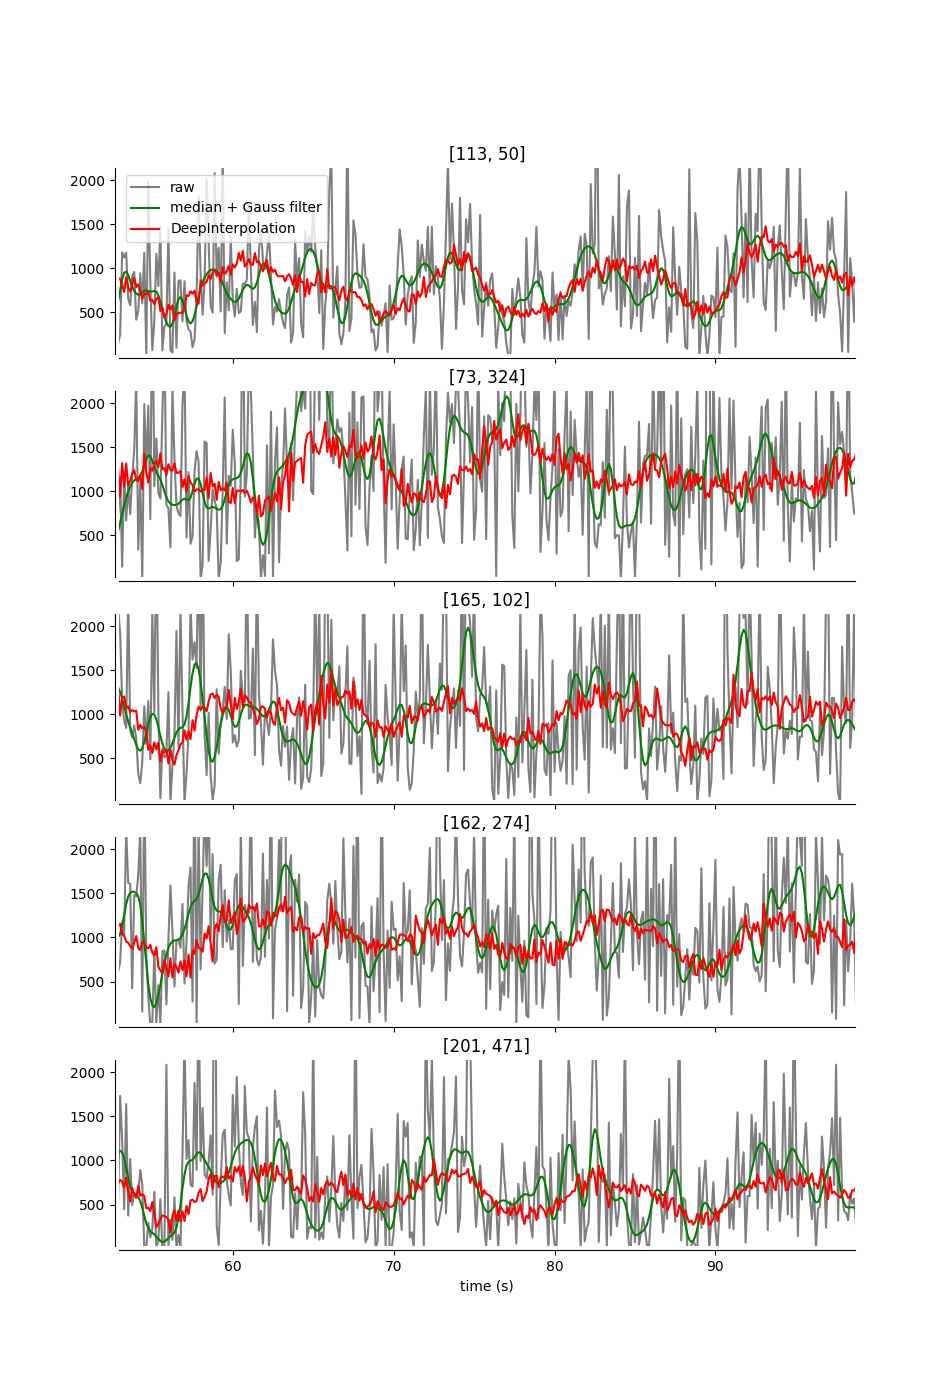

(0.0, 3000.0)

In [73]:
%matplotlib notebook

x = np.arange(1920) / 8

alpha = 1
spine_outward_shift=3

fig, axs = plt.subplots(ncols=1, nrows=5, figsize=(9.5, 14), sharex=True, sharey=True)
for i_ax, (ax, pixel) in enumerate(zip(axs, pixels)):
    ax.plot(x, raw[:, pixel[0], pixel[1]], 'k', label="raw", alpha=0.5)
    ax.plot(x, gaussian_filter1d(medfilt(raw[:, pixel[0], pixel[1]], [5]), sigma=2), 'g', label="median + Gauss filter")
    # ax.plot(full[:, pixel[0], pixel[1]], 'y', alpha=alpha)
    # ax.plot(random1_01[:, pixel[0], pixel[1]], 'b', alpha=alpha)
    # ax.plot(random1_05[:, pixel[0], pixel[1]], 'c', alpha=alpha)
    ax.plot(x, randomlrc_01[:, pixel[0], pixel[1]], 'r', alpha=alpha, label="DeepInterpolation")
    # ax.plot(randomlrc_05[:, pixel[0], pixel[1]], 'm', alpha=alpha)
    ax.set_title(pixel)
    if i_ax == 0:
        ax.legend()
        
    ax.spines['left'].set_position(('outward', spine_outward_shift))  # ('axes', -0.02))  # 'zero'

    # turn off the right spine/ticks
    ax.spines['right'].set_color('none')
    ax.yaxis.tick_left()

    # set the y-spine
    ax.spines['bottom'].set_position(('outward', spine_outward_shift))  # ('axes', -0.02))  # 'zero'

    # turn off the top spine/ticks
    ax.spines['top'].set_color('none')
    ax.xaxis.tick_bottom()
        
ax.set_xlabel("time (s)")
    
ax.set_xlim([200/8, 800/8])
ax.set_ylim([0, 3000])
# fig.suptitle("pixel signals")

<IPython.core.display.Javascript object>


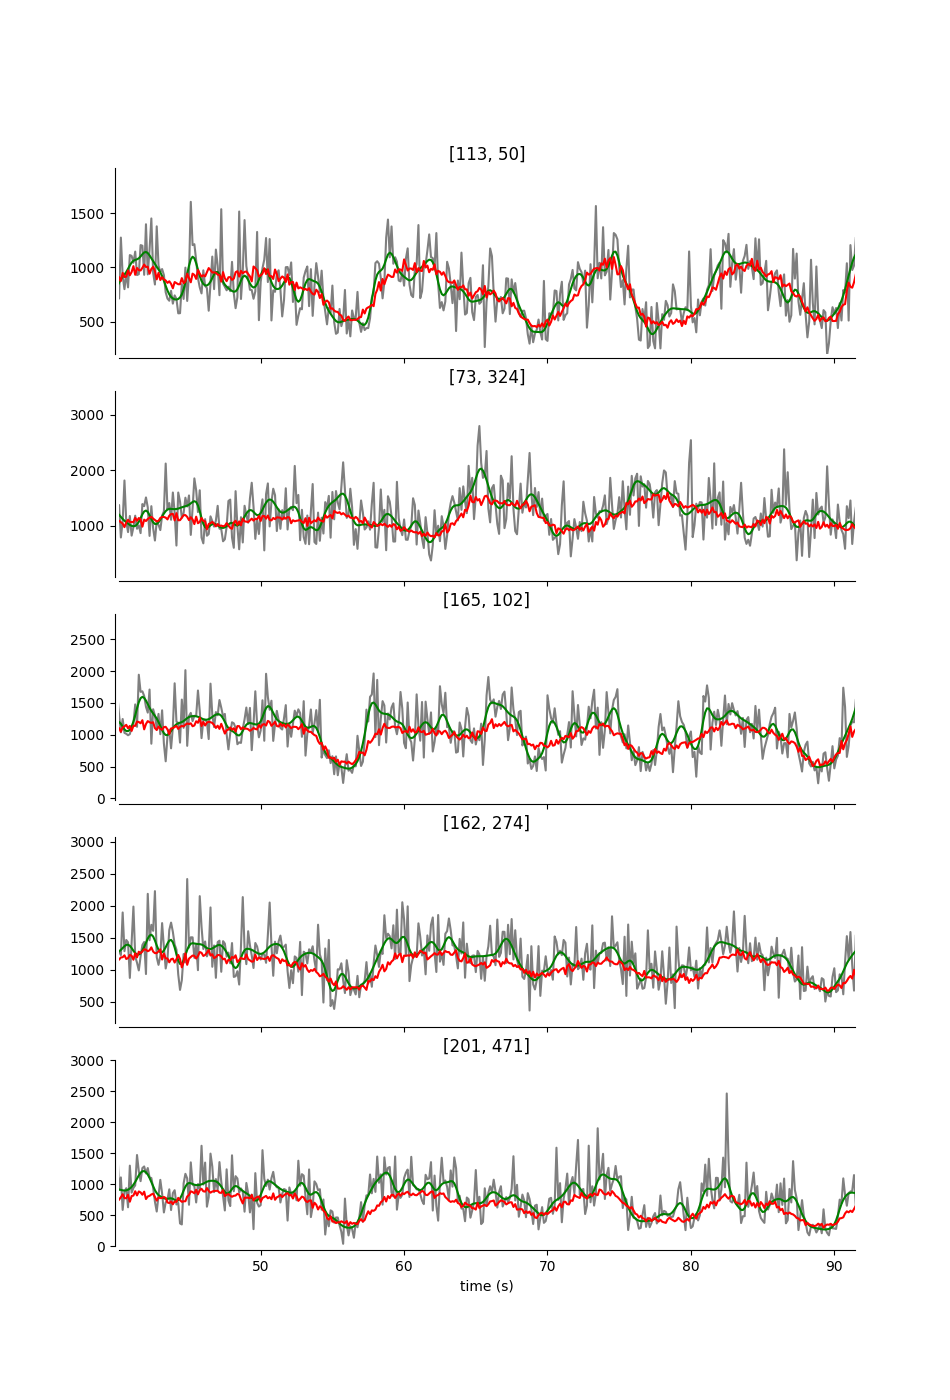

(0.0, 3000.0)

In [78]:
%matplotlib notebook
roi_size = 2
alpha = 1

x = np.arange(1920) / 8

alpha = 1
spine_outward_shift=3

fig, axs = plt.subplots(ncols=1, nrows=5, figsize=(9.5, 14), sharex=True, sharey=False)
for ax, pixel in zip(axs, pixels):
    roi_signal = np.mean(raw[:, pixel[0]-roi_size:pixel[0]+roi_size, pixel[1]-roi_size:pixel[1]+roi_size], 
                    axis=(1,2))
    ax.plot(x, roi_signal, 'k', label="raw", alpha=0.5)
    ax.plot(x, gaussian_filter1d(medfilt(roi_signal, [5]), sigma=2), 'g', label="median + Gauss filter")
    # ax.plot(np.mean(full[:, pixel[0]-roi_size:pixel[0]+roi_size, pixel[1]-roi_size:pixel[1]+roi_size], 
    #                 axis=(1,2)), 'y', alpha=alpha)
    # ax.plot(np.mean(random1_01[:, pixel[0]-roi_size:pixel[0]+roi_size, pixel[1]-roi_size:pixel[1]+roi_size], 
    #                 axis=(1,2)), 'b', alpha=alpha)
    # ax.plot(np.mean(random1_05[:, pixel[0]-roi_size:pixel[0]+roi_size, pixel[1]-roi_size:pixel[1]+roi_size], 
    #                 axis=(1,2)), 'c', alpha=alpha)
    ax.plot(x, np.mean(randomlrc_01[:, pixel[0]-roi_size:pixel[0]+roi_size, pixel[1]-roi_size:pixel[1]+roi_size], 
                    axis=(1,2)), 'r', alpha=alpha, label="DeepInterpolation")
    # ax.plot(np.mean(randomlrc_05[:, pixel[0]-roi_size:pixel[0]+roi_size, pixel[1]-roi_size:pixel[1]+roi_size], 
    #                 axis=(1,2)), 'm', alpha=alpha)
    ax.set_title(pixel)
    if i_ax == 0:
        ax.legend()
        
    ax.spines['left'].set_position(('outward', spine_outward_shift))  # ('axes', -0.02))  # 'zero'

    # turn off the right spine/ticks
    ax.spines['right'].set_color('none')
    ax.yaxis.tick_left()

    # set the y-spine
    ax.spines['bottom'].set_position(('outward', spine_outward_shift))  # ('axes', -0.02))  # 'zero'

    # turn off the top spine/ticks
    ax.spines['top'].set_color('none')
    ax.xaxis.tick_bottom()
        
ax.set_xlabel("time (s)")
    
ax.set_xlim([200/8, 800/8])
ax.set_ylim([0, 3000])
# fig.suptitle("${}^2$ ROI signals".format(roi_size*2+1))

## look at noise pixel

<IPython.core.display.Javascript object>


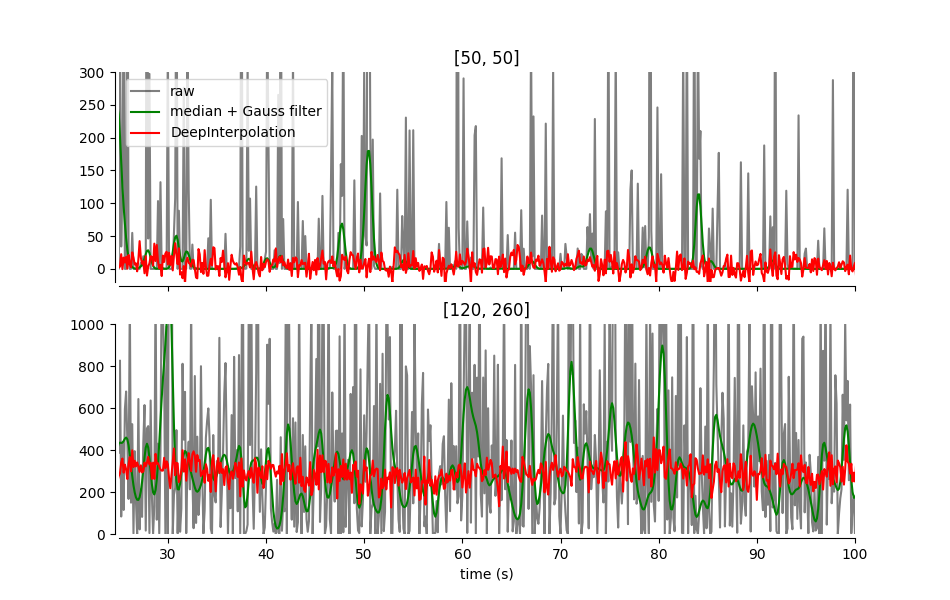

(0.0, 1000.0)

In [88]:
%matplotlib notebook

x = np.arange(1920) / 8

alpha = 1
spine_outward_shift=3

fig, axs = plt.subplots(ncols=1, nrows=2, figsize=(9.5, 6), sharex=True, sharey=False)
for i_ax, (ax, pixel) in enumerate(zip(axs, [[50,50], [120, 260]])):
    ax.plot(x, raw[:, pixel[0], pixel[1]], 'k', label="raw", alpha=0.5)
    ax.plot(x, gaussian_filter1d(medfilt(raw[:, pixel[0], pixel[1]], [5]), sigma=2), 'g', label="median + Gauss filter")
    # ax.plot(full[:, pixel[0], pixel[1]], 'y', alpha=alpha)
    # ax.plot(random1_01[:, pixel[0], pixel[1]], 'b', alpha=alpha)
    # ax.plot(random1_05[:, pixel[0], pixel[1]], 'c', alpha=alpha)
    ax.plot(x, randomlrc_01[:, pixel[0], pixel[1]], 'r', alpha=alpha, label="DeepInterpolation")
    # ax.plot(randomlrc_05[:, pixel[0], pixel[1]], 'm', alpha=alpha)
    ax.set_title(pixel)
    if i_ax == 0:
        ax.legend()
        ax.set_ylim([-20, 300])
        
    ax.spines['left'].set_position(('outward', spine_outward_shift))  # ('axes', -0.02))  # 'zero'

    # turn off the right spine/ticks
    ax.spines['right'].set_color('none')
    ax.yaxis.tick_left()

    # set the y-spine
    ax.spines['bottom'].set_position(('outward', spine_outward_shift))  # ('axes', -0.02))  # 'zero'

    # turn off the top spine/ticks
    ax.spines['top'].set_color('none')
    ax.xaxis.tick_bottom()
        
ax.set_xlabel("time (s)")
    
ax.set_xlim([200/8, 800/8])
ax.set_ylim([0, 1000])
# fig.suptitle("pixel signals")

# compute df/f

In [ ]:
from scipy.ndimage import gaussian_filter


import nely_suite

In [ ]:
stack = random1_01_path  # randomlrc_01_path

In [54]:
def compute_dff_from_stack(stack, baseline_blur=3, baseline_mode="convolve", # slow alternative: "quantile"
                           baseline_length=10, baseline_quantile=0.05, baseline_dir=None,
                           use_crop=True, manual_add_to_crop=20,
                           dff_blur=0, dff_out_dir=None, return_stack=True):
    N_frames, N_y, N_x = stack.shape

    # 1. blur stack if required
    stack_blurred = gaussian_filter(stack, (0, baseline_blur, baseline_blur)) if baseline_blur else stack
    
    # 2. compute baseline
    if baseline_mode == "convolve":
        dff_baseline = nely_suite.find_pixel_wise_baseline(stack_blurred, n=baseline_length)
    elif baseline_mode == "quantile":
        dff_baseline = nely_suite.quantile_baseline(stack_blurred, baseline_quantile)
    elif isinstance(baseline_mode, np.ndarray) and baseline_mode.shape == (N_y, N_x):
        dff_baseline = baseline_mode
    elif baseline_mode == "fromfile":
        dff_baseline = nely_suite.load_img(baseline_dir)
        assert dff_baseline.shape == (N_y, N_x)
    else:
        raise(NotImplementedError)

    if baseline_dir is not None and baseline_mode != "fromfile":
        nely_suite.save_img(baseline_dir, dff_baseline)
        
    # 3. compute cropping indices or use the ones supplied externally
    if (isinstance(use_crop, list) or isinstance(use_crop, tuple)) and len(use_crop) == 4:
        x_min, x_max, y_min, y_max = use_crop
    elif isinstance(use_crop, bool) and use_crop:
        mask = nely_suite.analysis.background_mask(stack_blurred, z_projection="std", threshold="otsu")
        idx = np.where(mask)
        y_min = np.maximum(np.min(idx[0]) - manual_add_to_crop, 0)
        y_max = np.minimum(np.max(idx[0]) + manual_add_to_crop, stack_blurred.shape[1] - 1)
        x_min = np.maximum(np.min(idx[1]) - manual_add_to_crop, 0)
        x_max = np.minimum(np.max(idx[1]) + manual_add_to_crop, stack_blurred.shape[2] - 1)
    else:
        x_min = 0
        x_max = N_x - 1
        y_min = 0
        y_max = N_y - 1
    
    #4. apply cropping
    stack = nely_suite.crop_stack(stack, x_min, x_max, y_min, y_max)
    stack_blurred = nely_suite.crop_stack(stack_blurred, x_min, x_max, y_min, y_max)
    dff_baseline = dff_baseline[y_min : y_max + 1, x_min : x_max + 1]
    
    # 5. compute dff
    # this also applies a median filter with (3,3,3) kernel 
    # and ignores the areas set to 0 by motion correction
    dff = nely_suite.calculate_dff(stack,
                                   dff_baseline, 
                                   apply_filter=True, occlusion_handling=True)
    
    # 6. post-process dff
    dff = gaussian_filter(dff, (0, dff_blur, dff_blur)) if dff_blur else dff

    if dff_out_dir is not None:
        nely_suite.save_img(dff_out_dir, dff)

    if return_stack:
        return dff
    else:
        return None

In [ ]:
%matplotlib notebook

fig, axs = plt.subplots(nrows=1, ncols=1, figsize=(9.5, 5))
axs.imshow(baseline)